# Introduction to ML; density estimation and regression

#### This notebook was developed by [Zeljko Ivezic](http://faculty.washington.edu/ivezic/) for the 2nd IAA-CSIC Severo Ochoa School on Statistics, Data Mining, and Machine Learning

<a id='toc'></a>

## This notebook includes:

[Introduction to ML in Astronomy](#intro)

[Density Estimation](#density) 

[Regression](#regression) 

# Introduction to Machine Learning in Astronomy <a id='intro'></a>



## The most useful ML methods and concepts: 

  
### Density Estimation

### Regression 

### Time series analysis 

### Dimensionality Reduction

### Clustering (unsupervised classification)

### Classification  (supervised classification) 




## Motivation comes from modern astronomical surveys: 

![SlideGrab](figures/lsst6.png)

  
## Density Estimation

### o Introduction to histograms

### o Kernel density estimation

### o Knuth’s histograms

### o Bayesian blocks

### o Gaussian Mixture models (1-D and multi-D) 

Here is an example: a Gaussian mixture model is constrained using 1000 "observed" points
and used to generate a sample of 5000 points; for more details see  
https://www.astroml.org/book_figures/chapter6/fig_GMM_clone.html


![](figures/fig_GMM_clone_1.png)

 

## Regression 

### o Linear models and the Least Square Method

### o "Total" Least Squares 

### o Outlier treatment 

### o Non-Linear models 

### o Overfitting and underfitting (model selection)

### o Regularization and penalizing the likelihood
  
  
Here is an example: standard cosmological integral fit to a simulated sample; for more details see  
https://www.astroml.org/book_figures/chapter8/fig_nonlinear_mu_z.html

![](figures/fig_nonlinear_mu_z_1.png)

 

## Time series analysis 

### o Periodicity

### o Power spectra

### o Temporally localized signals

### o Stochastic processes 


Here is an example: finding the best period for a sinusoidal variation using Lomb-Scargle periodogram; 
for more details see  
https://www.astroml.org/book_figures/chapter10/fig_LS_example.html

![](figures/fig_LS_example_1.png)


 
## Dimensionality Reduction

### o Principal Component Analysis (PCA)

### o Independent Component Analysis (ICA)

### o Non-negative matrix factorization (NMF) 

### o Manifold Learning (e.g. Local Linear Embedding)


Here is an example: decomposition of SDSS spectra of galaxies using PCA, ICA and NMF; for more details see 
https://www.astroml.org/book_figures/chapter7/fig_spec_decompositions.html


![](figures/fig_spec_decompositions_1.png)

## Unsupervised vs. Supervised Classification  

In density estimation, we estimate joint probability distributions from multivariate data sets to identify the inherent clustering. This is essentially **unsupervised classification**. Here “unsupervised” means that there is no prior information about the number and properties of clusters.
In other words, this method is search for unknown structure in your (multi-dimensional) dataset.

If we have labels for some of these data points (e.g., an object is tall, short, red, or blue), we can develop a relationship between the label and the properties of a source. This is **supervised classification**. In other words, this method is finding objects in 
your (multi-dimensional) dataset that "look like" objects in your training set. 

Classification, regression, and density estimation are all related. For example, the regression function $\hat{y} = f(y|\vec{x})$ is the best estimated value of $y$ given a value of $\vec{x}$. In classification $y$ is categorical and $f(y|\vec{x})$ is called the _discriminant function_.
 


## Clustering (unsupervised classification)

### o K-means algorithm

### o Gaussian Mixture Model

### o Hierarchical clustering

### and many more...

Here is an example: clustering based on mixture of Gaussians for two-dimensional stellar metallicity data derived from SDSS spectra, for more details see
https://www.astroml.org/book_figures/chapter6/fig_EM_metallicity.html

![](figures/2Dclustering.png)


## Classification  (supervised classification) 

### o Generative and Discriminative Classification 

- Using density estimation for classification is referred to as <u>_generative classification_</u> (we have a full model of the density for each class or we have a model which describes how data could be generated from each class). 

- Classification that finds the decision boundary that separates classes is called <u> _discriminative classification_ </u>

Both have their place in astrophysical classification.

### o Classification loss (risk)

### o Receiver Operating Characteristic (ROC) curves

### o Decision Trees

 


Here is an example: the so-called Kernel Support Vector Machine classification of RR Lyrae stars
using single-epoch SDSS colors, for more details see
https://www.astroml.org/book_figures/chapter9/fig_rrlyrae_kernelsvm.html

![](figures/fig_rrlyrae_kernelsvm_1.png)

##  Density Estimation <a id='density'></a>
[Go to top](#toc)


[Searching for Structure in 1-D Point Data](#basics1D) 

[Gaussian Mixture Models for 2-D Point Data](#GMM) 

In [1]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astroML.density_estimation import KNeighborsDensity
from astropy.visualization import hist

The code below ensures the fonts in plots are rendered LaTex.
This function adjusts matplotlib settings for a uniform feel in the textbook.
Note that with usetex=True, fonts are rendered with LaTeX. This may result in an error if LaTeX is not installed on your system. In that case, you can set usetex to False.

In [2]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


## Searching for Structure in 1-D Point Data<a id='basics1D'></a>
[Go to top](#toc)

### Generate our data

Generate our data: a mix of several Cauchy distributions
this is the same data used in the Bayesian Blocks figure

In [3]:
np.random.seed(0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

### Generating Distribution
plot the result of the generating distribution of the given dataset.

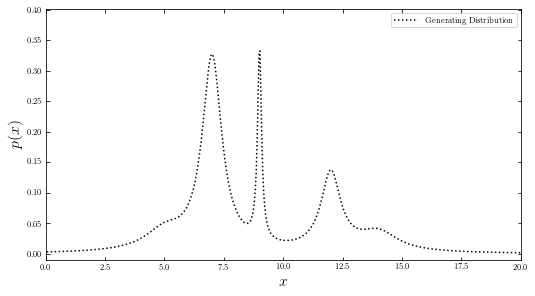

In [4]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
ax = fig.add_subplot(111)
t = np.linspace(-10, 30, 1000)

# plot_generating_data(x_values) takes a row vector with x values as parameter 
# and plots the generating distribution of the given data using true_pdf() function.
def plot_generating_data(x_values):
    ax.plot(x_values, true_pdf(x_values), ':', color='black', zorder=3,
                label="Generating Distribution")
    # label the plot
    ax.set_ylabel('$p(x)$', fontsize=16)

    # set axis limit
    ax.set_xlim(0, 20)
    ax.set_ylim(-0.01, 0.4001)

plot_generating_data(t)
ax.legend(loc='upper right')
ax.set_xlabel('$x$', fontsize=16)

plt.show()

### Kernel Density Estimation (KDE)

We often use Gaussian Kernel in KDE. Function $K(u)$ represents the weight at a given point, which is normalized such that $\int K(u)du = 1$.  
For a Gaussian Kernel:
$$K(u) = \frac{1}{ {2\pi}^{\frac{D}{2}} } e^{\frac{-{u}^2}{2}}$$

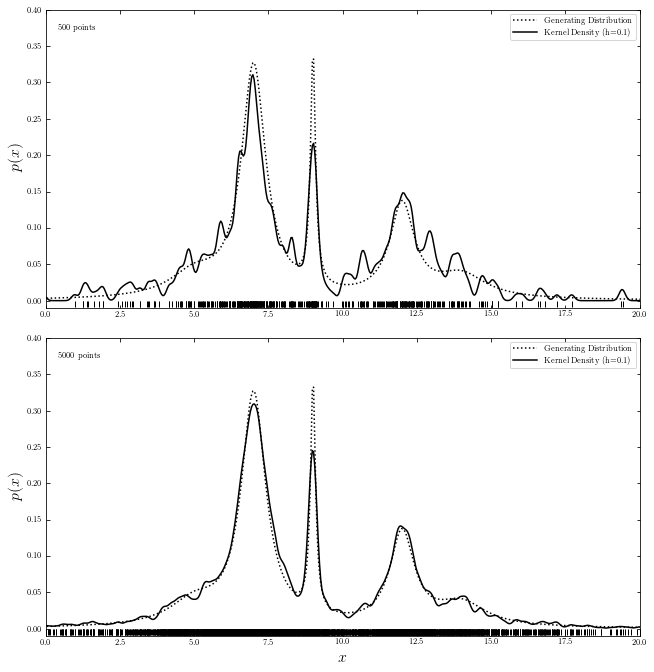

In [5]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
subplots = (211, 212)

# set N values to be 500 and 5000
N_values = (500, 5000)

# plot_kde(x_values) takes a row vector with x values as a parameter, computes the and plots KDE at x.
def plot_kde(x_values):
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(xN[:, None])
    dens_kde = np.exp(kde.score_samples(t[:, None]))
    ax.plot(x_values, dens_kde, '-', color='black', zorder=3,
            label="Kernel Density (h=0.1)")

    
for N, subplot in zip(N_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]
    
    # plot generating data in comparison with KDE
    plot_generating_data(t)
    plot_kde(t)
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')
    
    # make label and legend to the plot
    ax.legend(loc='upper right')
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)

    if subplot == 212:
        ax.set_xlabel('$x$', fontsize=16)

plt.show()

### Nearest-Neighbor Density Estimation

The code below plots generating distribution and a result from nearest-neighbor estimation.


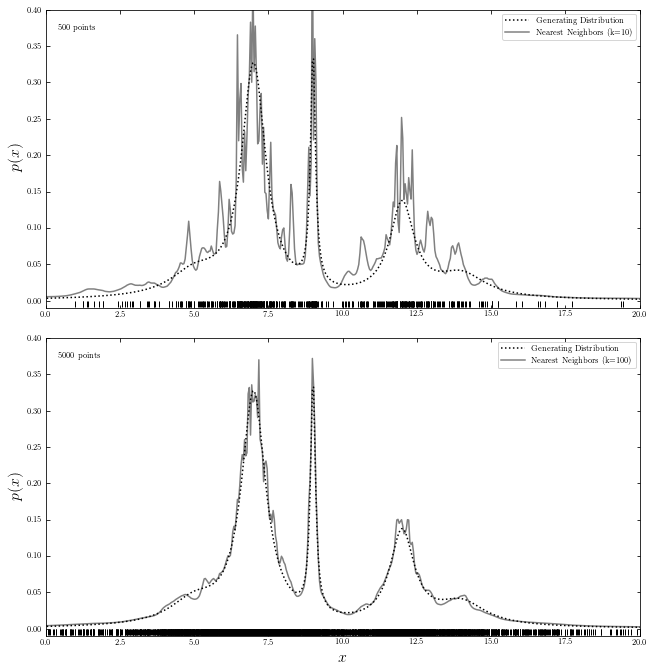

In [6]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)

k_values = (10, 100)

# plot_nearest_neighor(x_values) takes a row vector with x values as a parameter
# computes the and plots density with Bayesian nearest neighbors at x.
def plot_nearest_neighbor(x_values):
    nbrs = KNeighborsDensity('bayesian', n_neighbors=k).fit(xN[:, None])
    dens_nbrs = nbrs.eval(t[:, None]) / N
    ax.plot(x_values, dens_nbrs, '-', lw=1.5, color='gray', zorder=2,
            label="Nearest Neighbors (k=%i)" % k)

for N, k, subplot in zip(N_values, k_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]

    # plot generating data in comparison with nearest neighbor
    plot_generating_data(t)
    plot_nearest_neighbor(t)
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')
    
    # make label and legend to the plot
    ax.legend(loc='upper right')
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)

    if subplot == 212:
        ax.set_xlabel('$x$', fontsize=16)

plt.show()

### Bayesian Blocks

The code below plots generating distribution and Baysian block analysis.

Most methods for choosing histogram bin width, such as Knuth’s Bayesian method and
older methods (the Scott’s rule and the Freedman–Diaconis rule) have a distinct weakness: 
they assume a **uniform** width for the optimal histogram bins.  

This limitation can be lifted by maximizing a well-designed likelihood function over 
bins of varying width. This approach has been dubbed Bayesian blocks. The method was 
first developed in the field of time-domain analysis (by Jeff Scargle), but is readily
applicable to histogram data as well. 


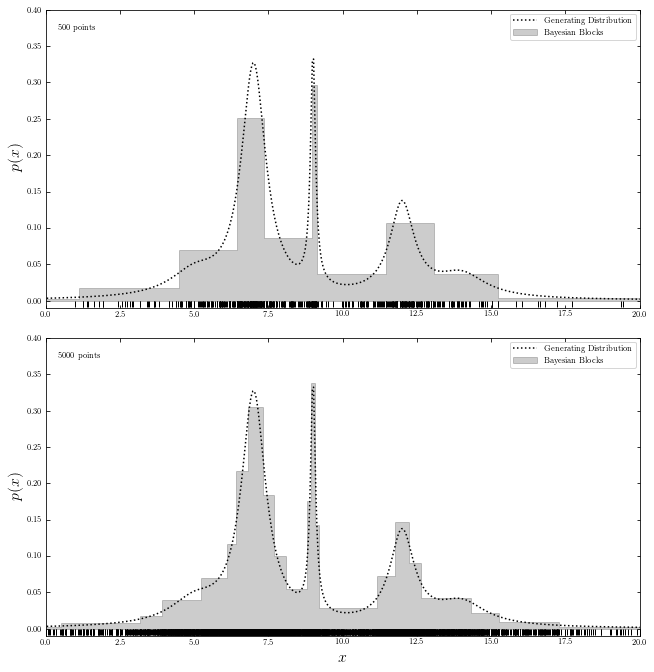

In [7]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)

# plot_bayesian_block(x_values) takes a row vector with x values as a parameter
# computes the and plots the estimated Bayesian blocks using histogram.
def plot_bayesian_block(x_values):
    hist(x_values, bins='blocks', ax=ax, density=True, zorder=1,
         histtype='stepfilled', color='k', alpha=0.2,
         label="Bayesian Blocks")

for N, k, subplot in zip(N_values, k_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]

    # plot generating data in comparison with bayesian blocks
    plot_generating_data(t)
    plot_bayesian_block(xN)
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')

    # make label and legend to the plot
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
    ax.legend(loc='upper right')

    if subplot == 212:
        ax.set_xlabel('$x$', fontsize=16)

plt.show()

### A comparison of the Three Estimations

The code below plots results from all three estimations in two subplots for reference.

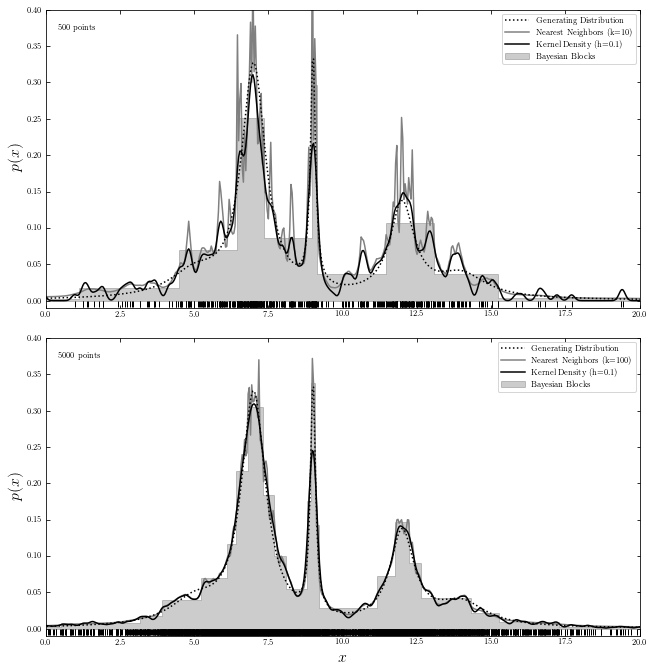

In [8]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)

for N, k, subplot in zip(N_values, k_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]

    # plot the results from three methods and generating data
    plot_generating_data(t)
    plot_bayesian_block(xN)
    plot_nearest_neighbor(t)
    plot_kde(t)
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')

    # label the plot
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
    ax.legend(loc='upper right')

    if subplot == 212:
        ax.set_xlabel('$x$', fontsize=16)

plt.show()

#### Note that for the largest sample (N=5,000 points) all methods produces similar results.

#### However, for the smallest sample, differences between the methods are huge! 

#### The Bayesian Blocks method gives the simplest step-function fit supported by data.

## Gaussian Mixture Models for 2D Point Data <a id='GMM'></a>
[Go to top](#toc)

**Gaussian mixture model** is a relatively simple and straightfoward numerical method on obtaining data likelihood function, and expectation maximization algorithm for maximizing the likelihood.  
The likelihood of a datum $x_i$ for a Gaussian mixture model is given by  

$$p(x_i|\theta) = \sum_{j=1}^{M} \alpha_{j}\mathcal{N}(\mu_j, \sigma_j)$$  

where vector of parameters $\theta$ is estimated from Gaussian with parameters $\mu_j$ and $\sigma_j$.   
$\alpha_j$ is the normalization factor for each Gaussian, with $\sum_{j=1}^{M} \alpha_{j} = 1$.   
M is given.
  
Both **Akaike information criterion (AIC)** and **Bayesian information criterion (BIC)** are scoring systems for model comparisons in classical statistics dealing with models with different numbers of free parameters.  

Specifically, **AIC** is computed as

$$AIC \equiv -2 ln(L^0(M)) + 2k + \frac{2k(k+1)}{N-k-1}$$  

**BIC** is computed as

$$BIC \equiv -2ln[L^0(M)] + k lnN$$  
  
In this notebook, we are going to apply Gaussian mixture model on a dataset of stellar metallicity. Then we will use AIC, and BIC for model comparisons, and then plot the best scored model in BIC.  

NOTE: with Gaussian uncertainties, $-2ln[L^0(M)]$ becomes the more familiar $\chi^2$.

### 1. Import data and functions
The main function we use in this section is GaussianMixture from sklearn package. The data we use in the example is from a subset of SEGUE Stellar Parameters data, in which the parameters are estimated using (SEGUE Stellar Parameters Pipeline). Data reference from [Beers et al 2006](https://ui.adsabs.harvard.edu/abs/2006IAUJD..13E..26B/abstract).


In [9]:
from sklearn.mixture import GaussianMixture
from astroML.datasets import fetch_sdss_sspp
from astroML.plotting.tools import draw_ellipse

### 2. Get the Segue Stellar Parameters Pipeline data


In [10]:
data = fetch_sdss_sspp(cleaned=True)
X = np.vstack([data['FeH'], data['alphFe']]).T
# truncate dataset for speed
X = X[::5]

### 3. Compute Gaussian Mixture models & AIC/BIC
We calculate Gaussian Mixture model using compute_GaussianMixture, and take AIC/BIC from calculated models. 
We will evaluate between 1 and 13 Gaussian components of the model, and pick the number of components with the lowest BIC score.

In [11]:
N = np.arange(1, 14)

def compute_GaussianMixture(N, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GaussianMixture(n_components=N[i], max_iter=max_iter,
                                    covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GaussianMixture(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

i_best = np.argmin(BIC)
gmm_best = models[i_best]
print("best fit converged:", gmm_best.converged_)
print("BIC: n_components =  %i" % N[i_best])

best fit converged: True
BIC: n_components =  5


### 4. Compute 2D density

In [12]:
FeH_bins = 51
alphFe_bins = 51
H, FeH_bins, alphFe_bins = np.histogram2d(data['FeH'], data['alphFe'],
                                          (FeH_bins, alphFe_bins))

Xgrid = np.array(list(map(np.ravel,
                          np.meshgrid(0.5 * (FeH_bins[:-1]
                                             + FeH_bins[1:]),
                                      0.5 * (alphFe_bins[:-1]
                                             + alphFe_bins[1:]))))).T
log_dens = gmm_best.score_samples(Xgrid).reshape((51, 51))

### 5. Plot true data density

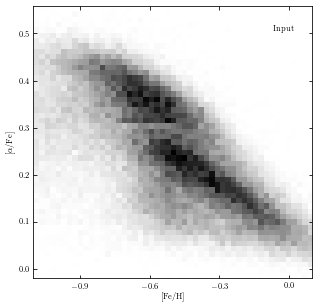

In [13]:
fig = plt.figure(figsize=(5, 5))

# define plot_figure to plot all figures with the same format.
def plot_figure(number, data, text):
    ax = fig.add_subplot(number)
    ax.imshow(data,
              origin='lower', interpolation='nearest', aspect='auto',
              extent=[FeH_bins[0], FeH_bins[-1],
                      alphFe_bins[0], alphFe_bins[-1]],
              cmap=plt.cm.binary)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
    ax.set_xlabel(r'$\rm [Fe/H]$')
    ax.set_xlim(-1.101, 0.101)
    ax.text(0.93, 0.93, text,
            va='top', ha='right', transform=ax.transAxes)
    ax.set_ylim(alphFe_bins[0], alphFe_bins[-1])
    return ax

ax = plot_figure(111, H.T, "Input")
ax.set_ylabel(r'$\rm [\alpha/Fe]$')
plt.show()

### 6. Plot AIC/BIC
We pick the N value for smallest score in BIC for the following calculations.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

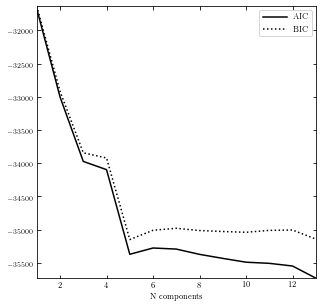

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, ':k', label='BIC')
ax.legend(loc=1)
ax.set_xlabel('N components')
plt.setp(ax.get_yticklabels(), fontsize=7)

 

### 7. Best configurations for BIC
Taking N = 5 components as the result of BIC evaluation, we plot the best estimated model.   
The reconstructed density are in grayscale. The Gaussians are solid ellipses in the figure. 

Text(0, 0.5, '$\\rm [\\alpha/Fe]$')

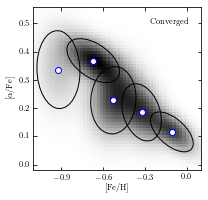

In [15]:
fig = plt.figure(figsize=(3,3))

ax = plot_figure(111, np.exp(log_dens), "Converged")

ax.scatter(gmm_best.means_[:, 0], gmm_best.means_[:, 1], c='w')
for mu, C, w in zip(gmm_best.means_, gmm_best.covariances_, gmm_best.weights_):
    draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', ec='k')

ax.set_ylabel(r'$\rm [\alpha/Fe]$')

### 8. Compare input data and converged model
We plot the input true density distribution and best scored model from BIC in comparison. As a result, we find component number = 5 best discribes this metallicity dataset. 

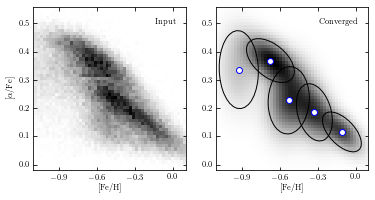

In [16]:
fig = plt.figure(figsize=(6, 3))

# plot density
ax1 = plot_figure(121, H.T, "Input")
ax1.set_ylabel(r'$\rm [\alpha/Fe]$')

ax2 = plot_figure(122, np.exp(log_dens), "Converged")
ax2.scatter(gmm_best.means_[:, 0], gmm_best.means_[:, 1], c='w')
for mu, C, w in zip(gmm_best.means_, gmm_best.covariances_, gmm_best.weights_):
    draw_ellipse(mu, C, scales=[1.5], ax=ax2, fc='none', ec='k')

## Back to 1D to make another important point

In [17]:
### Modeled after astroML book figure 4.2  
from sklearn.mixture import GaussianMixture as GMM
setup_text_plots(fontsize=18, usetex=True)

def doGMM(Ndata, noiseStd=0.00000001):
    #------------------------------------------------------------
    # Set up the dataset by drawing samples from Gaussians.
    #  We'll use scikit-learn's Gaussian Mixture Model to sample
    #  data from a mixture of 1-D Gaussians.  The usual way of using
    #  this involves fitting the mixture to data: we'll see that
    #  below.  Here we'll set the internal means, covariances,
    #  and weights by-hand and then generate a sample of requested 
    #  size Ndata. 
    N1 = int(0.2*Ndata)
    N2 = int(0.3*Ndata)
    N3 = int(0.2*Ndata)
    N4 = Ndata - (N1+N2+N3)
    random_state = np.random.RandomState(seed=1)
    X = np.concatenate([random_state.normal(-4, 1.1, N1),
                    random_state.normal(-1, 1.0, N2),
                    random_state.normal(0.9, 0.7, N3),
                    random_state.normal(3, 1.0, N4)]).reshape(-1, 1)
    X = np.random.normal(X, noiseStd)

    #------------------------------------------------------------
    # Learn (train) the best-fit GMM models
    # Here we'll use GMM in the standard way: the fit() method
    # uses an Expectation-Maximization approach to find the best
    # mixture of Gaussians for the data

    # fit models with 1-10 components
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]
    for i in range(len(N)):
        models[i] = GMM(N[i]).fit(X)
    # compute the BIC for each model
    BIC = [m.bic(X) for m in models]

    #------------------------------------------------------------
    # Plot the results
    #  We'll use two panels:
    #   1) data + best-fit mixture
    #   2) BIC vs number of components 

    fig = plt.figure(figsize=(12, 7))
    fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


    # plot 1: data + best-fit mixture
    ax = fig.add_subplot(121)
    M_best = models[np.argmin(BIC)]

    x = np.linspace(-10, 10, 1000)
    logprob = M_best.score_samples(x.reshape(-1, 1))
    responsibilities = M_best.predict_proba(x.reshape(-1, 1))

    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    ax.hist(X, 'auto', density=True, histtype='stepfilled', alpha=0.4)
    ax.plot(x, pdf, '-k')
    ax.plot(x, pdf_individual, '--k')
    ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')

    # plot 2: BIC
    ax = fig.add_subplot(122)
    ax.plot(N, BIC, '--k')
    ax.set_xlabel('n. components')
    ax.set_ylabel('BIC')

    ibest = np.argmin(BIC)
    print(BIC[ibest-1]-BIC[ibest], BIC[ibest], BIC[ibest+1]-BIC[ibest])
    plt.show()

978.2006100125727 471783.38135260454 500.43853850394953


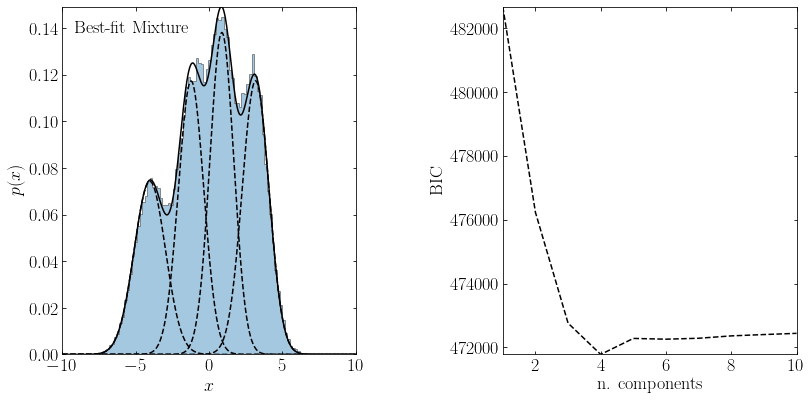

CPU times: user 25.7 s, sys: 1.25 s, total: 27 s
Wall time: 4.97 s


In [18]:
# let's see what we have, using a huge number of data points
%time doGMM(100000)   # about 4 min for 1 million points

4.741087633834013 1448.698109483906 15.38570464985628


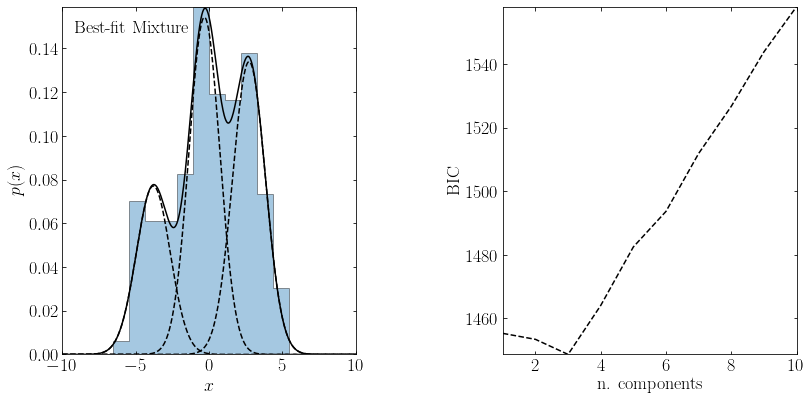

CPU times: user 1.18 s, sys: 35.6 ms, total: 1.22 s
Wall time: 364 ms


In [19]:
# what if we have a much smaller sample?
%time doGMM(300)  

##  How do we interpret BIC? 

The figure above (right panel) shows that the 3-component model has a BIC lower
by about 15 than the 4-component model. Is this sufficient evidence to claim 
that the former is really really better choice than the latter? 

As you may recall,  

**How do we interpret the values of the odds ratio in practice? **
Jeffreys proposed a five-step scale for interpreting the odds ratio, where $O_{21} > 10$ represents “strong” evidence in favor of $M_2$ ($M_2$ is ten times more probable than $M_1$), and $O_{21} > 100$ is “decisive” evidence ($M_2$ is one hundred times more probable than $M_1$). When $O_{21} < 3$, the evidence is “not worth more than a bare mention.”

Given the relationship between the BIC and $O_{21},$ 
$$    \Delta BIC \equiv BIC_2 - BIC_1 = -2\,\ln(O_{21}) $$ 
we have that $O_{21}=10$ corresponds to $\Delta BIC= -4.6$ and $O_{21}=100$ corresponds to $\Delta BIC = -9.2$.
For completeness, $|\Delta BIC|<2$ is “not worth more than a bare mention.”

Therefore, **$|\Delta BIC| = 5$ corresponds to “strong” evidence and $|\Delta BIC| = 10$ to “decisive” evidence.**

Another way to interpret $|\Delta BIC| = 15$ is to say that the model with 3 components is $exp(15/2) \approx 2000$ times more probable than the model with 4 components.

We can conclude that the figure shows **decisive** evidence in favor of the 3-component model. That is,
you should **not** argue that there are 4 peaks in the left panel! Altough we **did** draw that dataset
from a model with 4 components, a sample of 300 values is insufficient to 
*discover* more than 3 components!

What if we increase the sample size? 

26.068238007530454 23675.215439143773 49.59603812700152


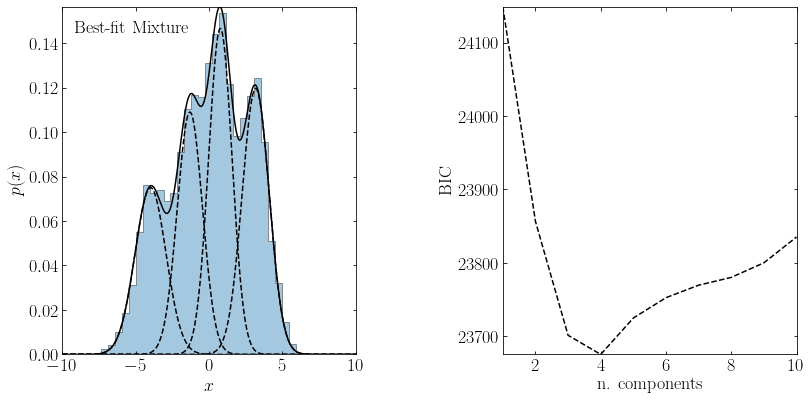

CPU times: user 3.76 s, sys: 309 ms, total: 4.07 s
Wall time: 695 ms


In [20]:
%time doGMM(5000)

#### Conclusion: Large sample size helps! (I love surveys, I love LSST!)

But one more thing: let's convolve our data with an arbitrary Gaussian to simulate measurement errors.



86.83948101025089 25373.328126269746 21.940829666556965


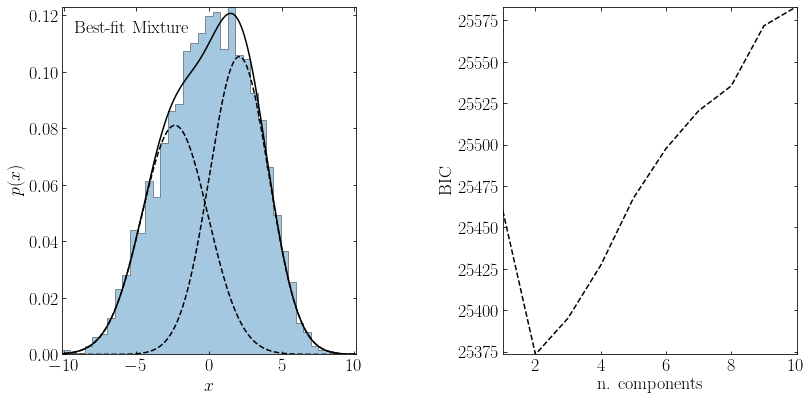

CPU times: user 4.16 s, sys: 248 ms, total: 4.4 s
Wall time: 737 ms


In [21]:
%time doGMM(5000,1.5)

#### Conclusion: If you badly "blur" your sample, of course you will not see the fine structure (i.e. many components)! 

Therefore, even with large samples, you still need to have precise and well calibrated 
measurements! Another reason to love LSST!

## Regression  <a id='regression'></a>  
[Go to top](#toc)

[Ordinary least square method](#ordinaryLSQ)

[Total least square method](#totalLSQ) 

[Linear Basis Function Regression](#basis)  

## Ordinary least square method <a id='ordinaryLSQ'></a>

In [22]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib
matplotlib.rc('text', usetex=False)
import seaborn as sns
from scipy import optimize

from astroML.linear_model import TLS_logL
from astroML.datasets import fetch_vega_spectrum
from astroML.plotting import setup_text_plots
from astroML.plotting.mcmc import convert_to_stdev
setup_text_plots(fontsize=8, usetex=True)
# random seed 
np.random.seed(42)

In [23]:
# We'll use the data from table 1 of Hogg et al. 2010
from astroML.datasets import fetch_hogg2010test  
data = fetch_hogg2010test()
data = data[5:]  # no outliers (the first 5 points are outliers, discussed later)
x = data['x']
y = data['y']
sigma_x = data['sigma_x']
sigma_y = data['sigma_y']
rho_xy = data['rho_xy']
y_obs = y

(100.0, 600.0)

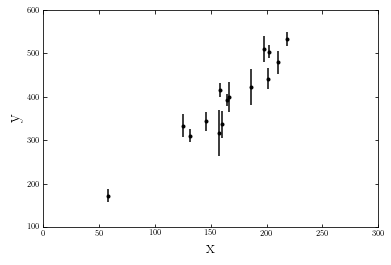

In [24]:
# Plot the data with y error bars
plt.errorbar(x, y, yerr=sigma_y, fmt=".k", capsize=0) 
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.xlim(0, 300)
plt.ylim(100, 600)

#### We have data $y(x)$ and we want to fit this model (i.e. we want to obtain m and b):

$$\mathbf{y} = m \, \mathbf{x} + b$$


For this problem the maximum likelihood and full posterior probability distribution (under infinitely broad priors) for the slope and intercept of the line are known analytically. The analytic result for the posterior probability distribution is a 2-d Gaussian with mean

$$\mathbf{w} = \left(\begin{array}{c}
    m \\ b
\end{array}\right) = (\mathbf{A}^\mathrm{T}\,C^{-1}\mathbf{A})^{-1} \, \mathbf{A}^\mathrm{T}\,C^{-1}\,\mathbf{y}$$

and covariance matrix

$$\mathbf{V} = (\mathbf{A}^\mathrm{T}\,C^{-1}\mathbf{A})^{-1}$$

where

$$\mathbf{y} = \left(\begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_N
\end{array}\right) \quad , \quad \mathbf{A} = \left(\begin{array}{cc}
x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_N & 1
\end{array}\right) \quad ,\, \mathrm{and} \quad
\mathbf{C} = \left(\begin{array}{cccc}
\sigma_1^2 & 0 & \cdots & 0 \\
0 & \sigma_2^2 & \cdots & 0 \\
&&\ddots& \\
0 & 0 & \cdots & \sigma_N^2
\end{array}\right)$$

There are various functions in Python for computing this but let's do it explicitly and step by step. With numpy, it only takes a few lines of code  - here it is:

In [25]:
A = np.vander(x, 2)  # Take a look at the documentation to see what this function does!
                     # https://numpy.org/doc/stable/reference/generated/numpy.vander.html
ATA = np.dot(A.T, A / sigma_y[:, None]**2)
w = np.linalg.solve(ATA, np.dot(A.T, y / sigma_y**2))
V = np.linalg.inv(ATA)

Let's take a look and see what this prediction looks like. 

To do this, we'll sample 99 slopes and intercepts from this 2-D Gaussian and overplot them on the data.

Text(0, 0.5, 'y')

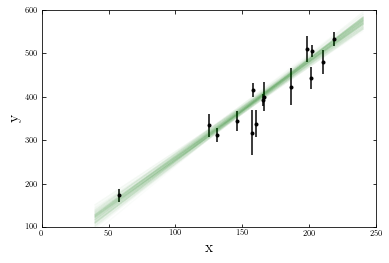

In [26]:
plt.errorbar(x, y, yerr=sigma_y, fmt=".k", capsize=0)
xGrid = np.linspace(40, 240)
# note that we are drawing 99 lines here, with m and b randomly sampled from w and V 
for m, b in np.random.multivariate_normal(w, V, size=99):
    plt.plot(xGrid, m*xGrid + b, "g", alpha=0.02)
plt.xlim(0, 250)
plt.ylim(100, 600)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

Text(0, 0.5, 'b')

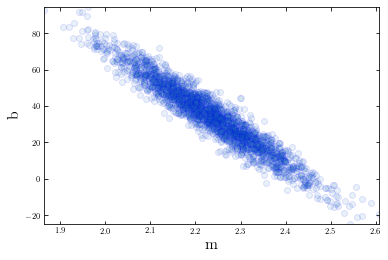

In [27]:
# let's visualize the covariance between m and b
a = np.random.multivariate_normal(w, V, size=2400)
plt.scatter(a[:,0], a[:,1], alpha=0.1)
plt.xlabel('m', fontsize=16)
plt.ylabel('b', fontsize=16) 

### Another approach: the probabilistic model

In order to perform posterior inference on a model and dataset, we need a function that computes the value of the posterior probability given a proposed setting of the parameters of the model. For reasons that will become clear below, we actually only need to return a value that is *proportional* to the probability.

As discussed in a previous tutorial, the posterior probability for parameters $\mathbf{w} = (m,\,b)$ conditioned on a dataset $\mathbf{y}$ is given by

$$p(\mathbf{w} \,|\, \mathbf{y}) = \frac{p(\mathbf{y} \,|\, \mathbf{w}) \, p(\mathbf{w})}{p(\mathbf{y})}$$

where $p(\mathbf{y} \,|\, \mathbf{w})$ is the *likelihood* and $p(\mathbf{w})$ is the *prior*. For this example, we're modeling the likelihood by assuming that the datapoints are independent with known Gaussian uncertainties $\sigma_n$. This specifies a likelihood function:

$$p(\mathbf{y} \,|\, \mathbf{w}) = \prod_{n=1}^N \frac{1}{\sqrt{2\,\pi\,\sigma_n^2}} \,
\exp \left(-\frac{[y_n - f_\mathbf{w}(x_n)]^2}{2\,\sigma_n^2}\right)$$

where $f_\mathbf{w}(x) = m\,x + b$ is the linear model.

For numerical reasons, we will acutally want to compute the logarithm of the likelihood. In this case, this becomes:

$$\ln p(\mathbf{y} \,|\, \mathbf{w}) = -\frac{1}{2}\sum_{n=1}^N \frac{[y_n - f_\mathbf{w}(x_n)]^2}{\sigma_n^2} + \mathrm{constant} \quad.$$

By maxmizing $p(\mathbf{y} \,|\, \mathbf{w})$, we obtain posterior probability distributions for $m$ and $b$.

##  "Total Least Squares" regression <a id='totalLSQ'></a>

or
### LSQ with uncertainties in both the dependent and independent axes 

In almost all real-world applications, the assumption that one
variable (the independent variable) is essentially free
from any uncertainty is not valid. Both the dependent and independent
variables will have measurement uncertainties.

The impact of errors on the ``independent'' variables is a bias in the
derived regression coefficients. This is straightforward to show if
we consider a linear model with a dependent and independent
variable, $y^*$ and $x^*$. We can write the objective function as
before,

\begin{equation}
y^*_i=\theta_0 + \theta_1x^*_{i}.
\end{equation}

Now let us assume that we observe
$y$ and $x$, which are noisy
representations of $y^*$ and $x^*$, i.e.,
\begin{eqnarray}
x_i&=&x^*_i + \delta_i,\\
y_i &=& y^* + \epsilon_i,
\end{eqnarray}
with $\delta$ and $\epsilon$ centered normal distributions.

Solving for $y$ we get
\begin{equation}
      y=  \theta_0 + \theta_1 (x_i - \delta_i) +\epsilon_i.
\end{equation}

The uncertainty in $x$ is now part of the regression equation and
scales with the regression coefficients (biasing the regression
coefficient).  This problem is known in the statistics literature
as *total least squares* and belongs to the class of ``errors-in-variables''
problems.


For a detailed discussion of the solution to this problem, which is essentially
maximum likelihood estimation, please see
Chapter 8 in the reference book. Two other recommended references are
Hogg et al. (2010, astro-ph/1008.4686) and Kelly et al. (2011, astro-ph/1112.1745).

Let's now play with the data! 

In [28]:
# Define some convenience functions

# translate between typical slope-intercept representation,
# and the normal vector representation
def get_m_b(beta):
    b = np.dot(beta, beta) / beta[1]
    m = -beta[0] / beta[1]
    return m, b


def get_beta(m, b):
    denom = (1 + m * m)
    return np.array([-b * m / denom, b / denom])


# compute the ellipse principal axes and rotation from covariance
def get_principal(sigma_x, sigma_y, rho_xy):
    sigma_xy2 = rho_xy * sigma_x * sigma_y

    alpha = 0.5 * np.arctan2(2 * sigma_xy2,
                             (sigma_x ** 2 - sigma_y ** 2))
    tmp1 = 0.5 * (sigma_x ** 2 + sigma_y ** 2)
    tmp2 = np.sqrt(0.25 * (sigma_x ** 2 - sigma_y ** 2) ** 2 + sigma_xy2 ** 2)

    return np.sqrt(tmp1 + tmp2), np.sqrt(tmp1 - tmp2), alpha


# plot ellipses
def plot_ellipses(x, y, sigma_x, sigma_y, rho_xy, factor=2, ax=None):
    if ax is None:
        ax = plt.gca()

    sigma1, sigma2, alpha = get_principal(sigma_x, sigma_y, rho_xy)

    for i in range(len(x)):
        ax.add_patch(Ellipse((x[i], y[i]),
                             factor * sigma1[i], factor * sigma2[i],
                             alpha[i] * 180. / np.pi,
                             fc='none', ec='k'))
        
# Find best-fit parameters
def get_best_fit(x, y, sigma_x, sigma_y, rho_xy):
    X = np.vstack((x, y)).T
    dX = np.zeros((len(x), 2, 2))
    dX[:, 0, 0] = sigma_x ** 2
    dX[:, 1, 1] = sigma_y ** 2
    dX[:, 0, 1] = dX[:, 1, 0] = rho_xy * sigma_x * sigma_y

    # note: TLS_logL was imported from astroML.linear_model 
    min_func = lambda beta: -TLS_logL(beta, X, dX)
    # this is optimization, not MCMC
    return optimize.fmin(min_func, x0=[-1, 1])


# plot results 
def plot_best_fit(x, y, sigma_x, sigma_y, rho_xy, beta_fit, mLSQ, bLSQ):
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25, bottom=0.15, top=0.9)
    ax = fig.add_subplot(121)
    ax.scatter(x, y, c='k', s=9)
    plot_ellipses(x, y, sigma_x, sigma_y, rho_xy, ax=ax)
    
    # plot the best-fit line
    m_fit, b_fit = get_m_b(beta_fit)
    x_fit = np.linspace(0, 300, 10)
    ax.plot(x_fit, m_fit * x_fit + b_fit, '-k')
    ax.plot(x_fit, mLSQ * x_fit + bLSQ, '--', c='red')

    ax.set_xlim(40, 250)
    ax.set_ylim(100, 600)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    # plot the likelihood contour in m, b
    ax = fig.add_subplot(122)
    m = np.linspace(1.7, 2.8, 100)
    b = np.linspace(-60, 110, 100)
    logL = np.zeros((len(m), len(b)))

    X = np.vstack((x, y)).T
    dX = np.zeros((len(x), 2, 2))
    dX[:, 0, 0] = sigma_x ** 2
    dX[:, 1, 1] = sigma_y ** 2
    dX[:, 0, 1] = dX[:, 1, 0] = rho_xy * sigma_x * sigma_y
    for i in range(len(m)):
        for j in range(len(b)):
            logL[i, j] = TLS_logL(get_beta(m[i], b[j]), X, dX)

    ax.contour(m, b, convert_to_stdev(logL.T),
           levels=(0.683, 0.955, 0.997), colors='k')
    ax.plot([-1000, 1000], [bLSQ, bLSQ], ':k', lw=1, c='red')
    ax.plot([mLSQ, mLSQ], [-1000, 1000], ':k', lw=1, c='red')

    ax.set_xlabel('slope')
    ax.set_ylabel('intercept')
    ax.set_xlim(1.7, 2.8)
    ax.set_ylim(-60, 110)

    plt.show()

In [29]:
# for comparison, let's get the standard LSQ solution
mux = np.mean(x)
muy = np.mean(y)
mLSQ = np.sum(x*y-mux*muy)/np.sum((x-mux)**2)
bLSQ = muy - mLSQ*mux
print('mLSQ=', mLSQ)
print('bLSQ=', bLSQ)

mLSQ= 2.191027996426704
bLSQ= 32.00396939102313


Optimization terminated successfully.
         Current function value: 56.688229
         Iterations: 85
         Function evaluations: 160
m= 2.299303276704902
b= 24.151505990843706


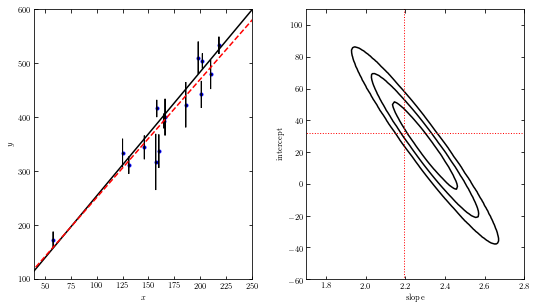

In [30]:
## let's do only errors in y - this is standard LSQ 
# Find best-fit parameters
err_x = 0*sigma_x
err_y = sigma_y
rho = 0*rho_xy
best_fit1 = get_best_fit(x, y, err_x, err_y, rho) 
m_fit1, b_fit1 = get_m_b(best_fit1)
print('m=', m_fit1)
print('b=', b_fit1)
# plot best fit 
plot_best_fit(x, y, err_x, err_y, rho, best_fit1, mLSQ, bLSQ)

Optimization terminated successfully.
         Current function value: 72.220549
         Iterations: 171
         Function evaluations: 318
m= 2.596107117541477
b= -43.9768263126515


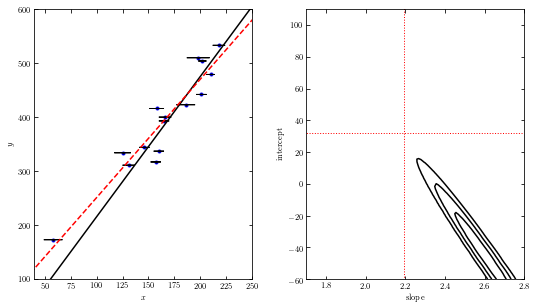

In [31]:
## now only errors in x; note that we could switch the axes and use standard LSQ
# Find best-fit parameters
err_x = sigma_x
err_y = 0*sigma_y
rho = rho_xy
best_fit2 = get_best_fit(x, y, err_x, err_y, rho) 
m_fit2, b_fit2 = get_m_b(best_fit2)
print('m=', m_fit2)
print('b=', b_fit2)
# plot best fit 
plot_best_fit(x, y, err_x, err_y, rho, best_fit2, mLSQ, bLSQ)

Optimization terminated successfully.
         Current function value: 56.630031
         Iterations: 71
         Function evaluations: 136
m= 2.3849344880407286
b= 6.042234007073399


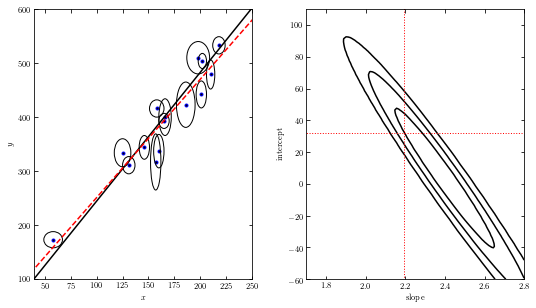

In [32]:
## errors in x and y, but without covariance
# Find best-fit parameters
err_x = sigma_x
err_y = sigma_y
rho = 0*rho_xy
best_fit3 = get_best_fit(x, y, err_x, err_y, rho) 
m_fit3, b_fit3 = get_m_b(best_fit3)
print('m=', m_fit3)
print('b=', b_fit3)
# plot best fit 
plot_best_fit(x, y, err_x, err_y, rho, best_fit3, mLSQ, bLSQ)

Optimization terminated successfully.
         Current function value: 55.711167
         Iterations: 88
         Function evaluations: 164
m= 2.248785375229947
b= 27.930434942133815


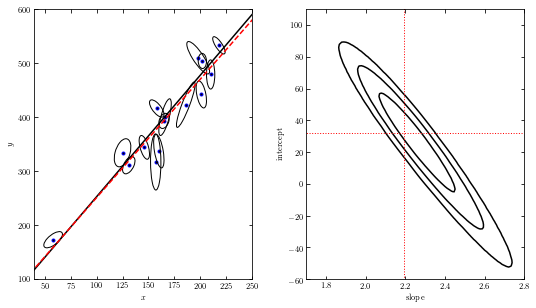

In [33]:
## errors in x and y with covariance
# Find best-fit parameters
err_x = sigma_x
err_y = sigma_y
rho = rho_xy
best_fit4 = get_best_fit(x, y, err_x, err_y, rho) 
m_fit4, b_fit4 = get_m_b(best_fit4)
print('m=', m_fit4)
print('b=', b_fit4)
# plot best fit 
plot_best_fit(x, y, err_x, err_y, rho, best_fit4, mLSQ, bLSQ)

In [34]:
# compare all 4 versions and LSQ
print('m=', m_fit1, m_fit2, m_fit3, m_fit4, mLSQ)

m= 2.299303276704902 2.596107117541477 2.3849344880407286 2.248785375229947 2.191027996426704


### CONCLUSION

#### Beware of your measurement uncertainties, especially if both variables have them!

By the way, Markov Chain Monte Carlo (MCMC) method allows you to solve non-linear problems, too!  
But we cannot cover everything in only a few hours...
 
 
#### And finally, here is a brief example of using Huber loss function to handle outliers 

Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 43.439758
         Iterations: 59
         Function evaluations: 115
[  1.07674745 213.27350923]
[ 1.96473118 70.00573832]


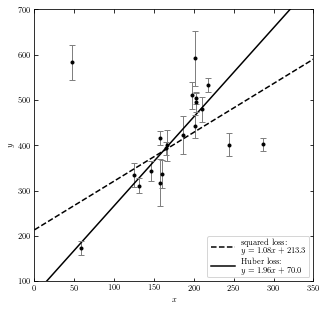

In [35]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from scipy import optimize
from astroML.datasets import fetch_hogg2010test

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get data: this includes outliers
data = fetch_hogg2010test()
x = data['x']
y = data['y']
dy = data['sigma_y']


# Define the standard squared-loss function
def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)


# Define the log-likelihood via the Huber loss function
def huber_loss(m, b, x, y, dy, c=2):
    y_fit = m * x + b
    t = abs((y - y_fit) / dy)
    flag = t > c
    return np.sum((~flag) * (0.5 * t ** 2) - (flag) * c * (0.5 * c - t), -1)

f_squared = lambda beta: squared_loss(beta[0], beta[1], x=x, y=y, dy=dy)
f_huber = lambda beta: huber_loss(beta[0], beta[1], x=x, y=y, dy=dy, c=1)

#------------------------------------------------------------
# compute the maximum likelihood using the huber loss
beta0 = (2, 30)
beta_squared = optimize.fmin(f_squared, beta0)
beta_huber = optimize.fmin(f_huber, beta0)

print(beta_squared)
print(beta_huber)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

x_fit = np.linspace(0, 350, 10)
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], '--k',
        label="squared loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))
ax.plot(x_fit, beta_huber[0] * x_fit + beta_huber[1], '-k',
        label="Huber loss:\n $y=%.2fx + %.1f$" % tuple(beta_huber))
ax.legend(loc=4)

ax.errorbar(x, y, dy, fmt='.k', lw=1, ecolor='gray')

ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

## Linear Basis Function Regression <a id='basis'></a>
[Go to top](#toc)

We don't have to use only polynomials ($x$, $x^2$, $x^3$, etc) - we can use any function f(x)
and still have a linear problem (in unknown coefficients, $a_i$), e.g.

$$  y(x) = \sum_i^N a_i \, f_i(x) $$

### Example: 

Let's express a complicated $y(x)$, such a spectrum of Vega, as sum of 
Gaussian functions: $ f_i(x) = N(x|\mu_i, \sigma)$, where $\mu_i$ are defined on a grid and $\sigma$ is constant and chosen depending on the intrinsic problem resolution.

Why? Because then we can do convolution with another function (which can be also expressed
as a series of Gaussian functions) analytically! 

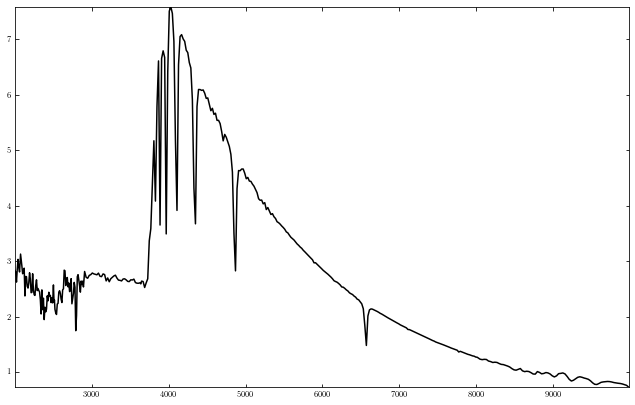

In [36]:
from astroML.datasets import fetch_vega_spectrum
# Fetch the data
x, y = fetch_vega_spectrum()
# truncate the spectrum
mask = (x >= 2000) & (x < 10000)
x = x[mask]
y = y[mask]*1.0e14

# a quick plot 
plt.figure(figsize=(11, 7))
plt.plot(x, y, '-k', label='input spectrum')
plt.show()

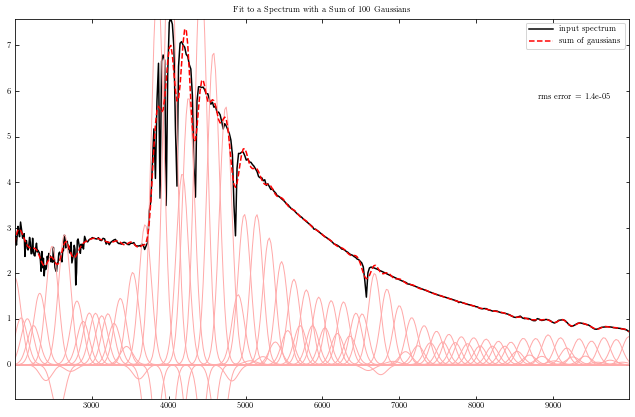

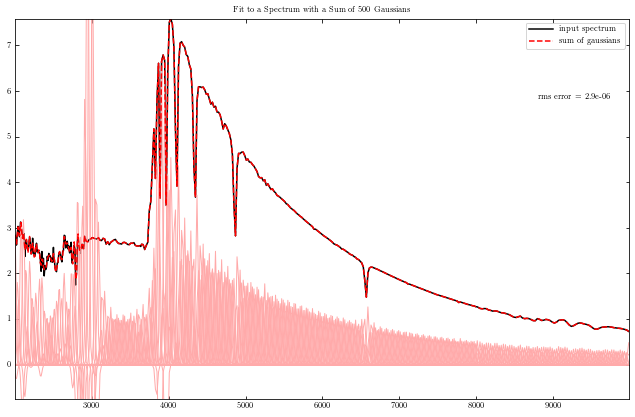

In [37]:
from astroML.sum_of_norms import sum_of_norms, norm
for n_gaussians in (100, 500):

    # compute the best-fit linear combination
    # the actual astroML code cab be found in file 
    #    $astroMLdir/astroML/sum_of_norms.py
    w_best, rms, locs, widths = sum_of_norms(x, y, n_gaussians,
                                             spacing='linear',
                                             full_output=True)

    norms = w_best * norm(x[:, None], locs, widths)

    # plot the results
    plt.figure(figsize=(11, 7))
    plt.plot(x, y, '-k', label='input spectrum')
    ylim = plt.ylim()

    plt.plot(x, norms, ls='-', c='#FFAAAA', lw=1)
    plt.plot(x, norms.sum(1), '--r', label='sum of gaussians')

    plt.ylim(-0.1 * ylim[1], ylim[1])
    plt.legend(loc=0)
    plt.text(0.97, 0.8,
             "rms error = %.2g" % rms,
             ha='right', va='top', transform=plt.gca().transAxes)
    plt.title("Fit to a Spectrum with a Sum of %i Gaussians" % n_gaussians)

plt.show()


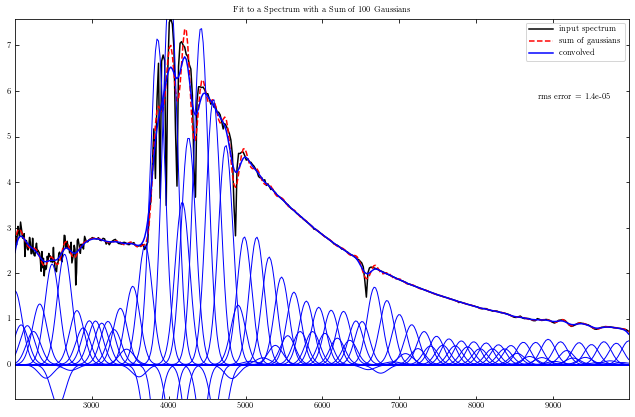

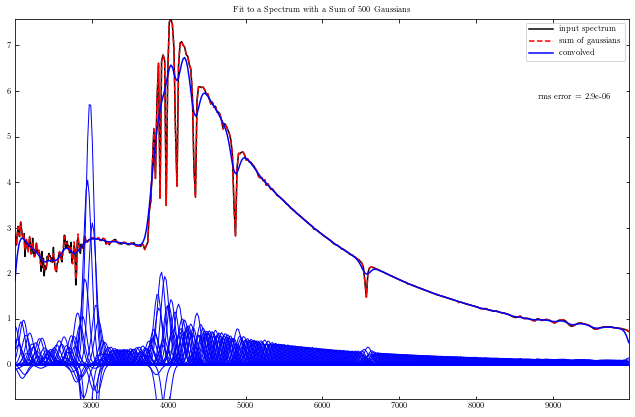

In [38]:
for n_gaussians in (100, 500):

    # compute the best-fit linear combination
    w_best, rms, locs, widths = sum_of_norms(x, y, n_gaussians,
                                             spacing='linear',
                                             full_output=True)

    norms = w_best * norm(x[:, None], locs, widths)

    # plot the results
    plt.figure(figsize=(11, 7))
    plt.plot(x, y, '-k', label='input spectrum')
    ylim = plt.ylim()

    # plt.plot(x, norms, ls='-', c='#FFAAAA', lw=1)
    plt.plot(x, norms.sum(1), '--r', label='sum of gaussians')

    
    # convolve with a gaussian instrumental resolution (width = 50)
    widths2 = np.sqrt(widths**2 + 50**2)
    norms2 = w_best * norm(x[:, None], locs, widths2)
    plt.plot(x, norms2, ls='-', c='blue', lw=1)
    plt.plot(x, norms2.sum(1), '-b', label='convolved')

    
    plt.ylim(-0.1 * ylim[1], ylim[1])
    plt.legend(loc=0)
    plt.text(0.97, 0.8,
             "rms error = %.2g" % rms,
             ha='right', va='top', transform=plt.gca().transAxes)
    plt.title("Fit to a Spectrum with a Sum of %i Gaussians" % n_gaussians)

plt.show()


## Yet another important example: use BIC to find the best polynomial model for a given dataset

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles
from scipy import stats
from scipy import optimize

# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, x, y, sigma_y, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, x, y, sigma_y, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, x, y, sigma_y, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

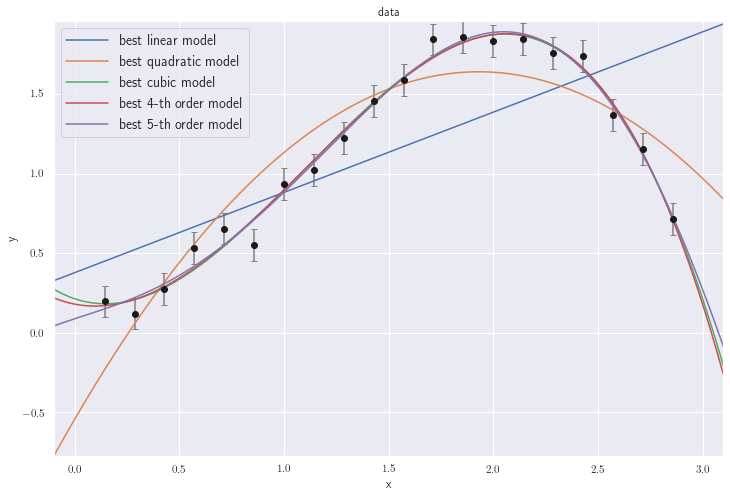

In [40]:
# generate (noisy) data
np.random.seed(0)
Ndata = 22
x = np.linspace(0, 3, Ndata)[1:-1]
sigma_y = 0.1 + 0*x
y = np.random.normal(np.sin(x) * x, sigma_y) 
# data = np.array([x, y, sigma_y])

# get best-fit parameters for linear, quadratic and cubic models
theta1 = best_theta(1, x, y, sigma_y)
theta2 = best_theta(2, x, y, sigma_y)
theta3 = best_theta(3, x, y, sigma_y)
theta4 = best_theta(4, x, y, sigma_y)
theta5 = best_theta(5, x, y, sigma_y)


# generate best fit lines on a fine grid 
xfit = np.linspace(-0.1, 3.1, 1000)
yfit1 = polynomial_fit(theta1, xfit)
yfit2 = polynomial_fit(theta2, xfit)
yfit3 = polynomial_fit(theta3, xfit)
yfit4 = polynomial_fit(theta4, xfit)
yfit5 = polynomial_fit(theta5, xfit)


# plot 
fig, ax = plt.subplots(figsize=(12, 8))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model')
ax.plot(xfit, polynomial_fit(theta4, xfit), label='best 4-th order model')
ax.plot(xfit, polynomial_fit(theta5, xfit), label='best 5-th order model')

ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

In [41]:
# compute chi2 per degree of freedom: sum{[(y-yfit)/sigma_y]^2} 
chi21 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chi22 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chi23 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
chi24 = np.sum(((y-polynomial_fit(theta4, x))/sigma_y)**2) 
chi25 = np.sum(((y-polynomial_fit(theta5, x))/sigma_y)**2) 


# the number of fitted parameters is 2, 3, 4, 5, 6
BIC1 = chi21 + 2*np.log(Ndata)
BIC2 = chi22 + 3*np.log(Ndata)
BIC3 = chi23 + 4*np.log(Ndata)
BIC4 = chi24 + 5*np.log(Ndata)
BIC5 = chi25 + 6*np.log(Ndata)


print ("         MODEL             CHI2          BIC")
print ('    best linear model:', chi21, BIC1)
print (' best quadratic model:', chi22, BIC2)
print ('     best cubic model:', chi23, BIC3)
print ('best 4-th order model:', chi24, BIC4)
print ('best 5-th order model:', chi25, BIC5)
print ("")
print ("Therefore, the cubic model is the winner!")

         MODEL             CHI2          BIC
    best linear model: 349.65913513675673 355.84122004347336
 best quadratic model: 99.33135251840808 108.60447987848303
     best cubic model: 10.182096497786729 22.546266311219995
best 4-th order model: 10.090493155738752 25.545705422530332
best 5-th order model: 9.753601458573456 28.299856178723353

Therefore, the cubic model is the winner!


[Go to top](#toc)